In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from math import sqrt

In [57]:
dfmain = pd.read_csv('bankfull_add.csv')

dfmain['education']=np.where(dfmain['education'] =='basic.9y', 'Basic', dfmain['education'])
dfmain['education']=np.where(dfmain['education'] =='basic.6y', 'Basic', dfmain['education'])
dfmain['education']=np.where(dfmain['education'] =='basic.4y', 'Basic', dfmain['education'])

In [58]:
dfmain.head(10)

,age,job,marital,education,contact,month,day,duration,campaign,pdays,...,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y,default,housing,loan
0,56,housemaid,married,Basic,telephone,may,mon,261,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
1,57,services,married,high.school,telephone,may,mon,149,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
2,37,services,married,high.school,telephone,may,mon,226,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0
3,40,admin.,married,Basic,telephone,may,mon,151,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
4,56,services,married,high.school,telephone,may,mon,307,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1
5,45,services,married,Basic,telephone,may,mon,198,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
6,59,admin.,married,professional.course,telephone,may,mon,139,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
7,41,blue-collar,married,unknown,telephone,may,mon,217,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
8,24,technician,single,professional.course,telephone,may,mon,380,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0
9,25,services,single,high.school,telephone,may,mon,50,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0


In [59]:
#Bank Marketing Data Set shape
print('This Marketing Campaigns data set has {} rows and {} columns.'.format(dfmain.shape[0], dfmain.shape[1]))

This Marketing Campaigns data set has 41188 rows and 21 columns.


In [60]:
enc = OneHotEncoder(handle_unknown='ignore')
X = dfmain[['job', 'marital', 'education', 'contact', 'month', 'day', 'poutcome']]
enc.fit(X)
enc.categories_
myvars = enc.transform(dfmain[['job', 'marital', 'education', 'contact', 'month', 'day', 'poutcome']]).toarray()
df2 = pd.DataFrame(myvars, columns=enc.get_feature_names_out(['job', 'marital', 'education', 'contact', 'month', 'day', 'poutcome']))
d = dict.fromkeys(df2.select_dtypes(np.float64).columns, np.int64)
df2 = df2.astype(d)
# df2.info()

In [61]:
dfmain.drop(['job', 'marital', 'education', 'contact', 'month', 'day', 'poutcome'], axis=1, inplace=True)
df = pd.merge(dfmain, df2, right_index=True, left_index=True)
df.head()

,age,duration,campaign,pdays,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,...,month_oct,month_sep,day_fri,day_mon,day_thu,day_tue,day_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [62]:
df = df.dropna()

In [63]:
X = df.drop('y', axis=1)
y = df['y']

In [64]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)

trainX = trainX.values
testX = testX.values
trainy = trainy.values
testy = testy.values

In [65]:
print('X_shapes:\n', 'trainX:', 'testX:\n', trainX.shape, testX.shape, '\n')
print('Y_shapes:\n', 'trainy:', 'testy:\n', trainy.shape, testy.shape)

X_shapes:
 trainX: testX:
 (32950, 55) (8238, 55) 

Y_shapes:
 trainy: testy:
 (32950,) (8238,)


In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainX[:,11:] = scaler.fit_transform(trainX[:,11:])
testX[:,11:] = scaler.transform(testX[:,11:])

In [67]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)
columns = trainX.columns

In [68]:
os_data_X,os_data_y=os.fit_resample(trainX, trainy)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  58490
Number of no subscription in oversampled data 29245
Number of subscription 29245
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


# Model Selection

In [69]:
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
import seaborn as sns

In [70]:
kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)

In [71]:
df_vars = df.columns.values.tolist() 
y= 'y'
X=[i for i in df_vars if i not in y]

In [72]:
logreg = LogisticRegression(solver='liblinear')

rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

cols = ['previous', 'euribor3m', 'job_housemaid', 'job_retired', 'job_student', 'marital_unknown', 'education_Basic', 
'education_illiterate', 'education_unknown', 'contact_cellular', 'contact_telephone', 'month_dec', 'month_jul', 
'month_jun', 'month_mar', 'month_may', 'month_oct', 'day_mon', 'poutcome_failure', 'poutcome_success']

X = os_data_X[cols]
y = os_data_y['y']

[False False False False False False False False False False False False
 False False  True  True  True False False  True  True False False False
  True  True  True  True  True  True  True False  True  True  True False
 False False False False False False False False False False False  True
  True  True  True  True False False False]
[35 33 30 36 27 26 25 32 23 31 34 28 29  4  1  1  1  2  6  1  1  7  3  5
  1  1  1  1  1  1  1 12  1  1  1 11 10 17 13 20 15 18 22 16 14 21 19  1
  1  1  1  1  9  8 24]


In [73]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.524110
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.244     
Dependent Variable:   y                 AIC:               61350.4128
Date:                 2024-08-12 15:48  BIC:               61529.9450
No. Observations:     58490             Log-Likelihood:    -30655.   
Df Model:             19                LL-Null:           -40542.   
Df Residuals:         58470             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous              0.9122   0.0469  19.4310 0.0000  0.8202  1.0042
euribor3m       

In [74]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='liblinear')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.884


when we predict a binary outcome, it is either a correct prediction (true positive) or not (false positive). There is a tension between these options, the same with true negative and false negative.
A skilful model will assign a higher probability to a randomly chosen real positive occurrence than a negative occurrence on average. Generally, skilful models are represented by curves that bow up to the top left of the plot.
A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases. A model with no skill is represented at the point (0.5, 0.5). A model with no skill at each threshold is represented by a diagonal line from the bottom left of the plot to the top right and has an `ROC_AUC` of **0.5**.
In this case, the accuracy of the Logistic Regression classifier on our test set is pretty good: `ROC_AUC` = **0.884**

In [76]:
y_pred = model.predict(testX)

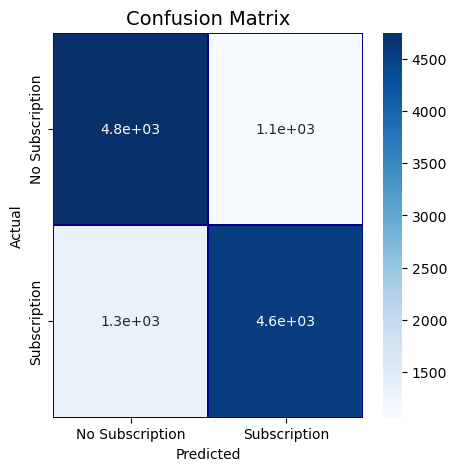

Predicted     0     1
Actual               
0          4750  1062
1          1327  4559


In [77]:
cm = pd.crosstab(testy, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['No Subscription', 'Subscription'],
            yticklabels=['No Subscription', 'Subscription'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()
print(cm)

In [78]:
print(classification_report(testy, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      5812
           1       0.81      0.77      0.79      5886

    accuracy                           0.80     11698
   macro avg       0.80      0.80      0.80     11698
weighted avg       0.80      0.80      0.80     11698



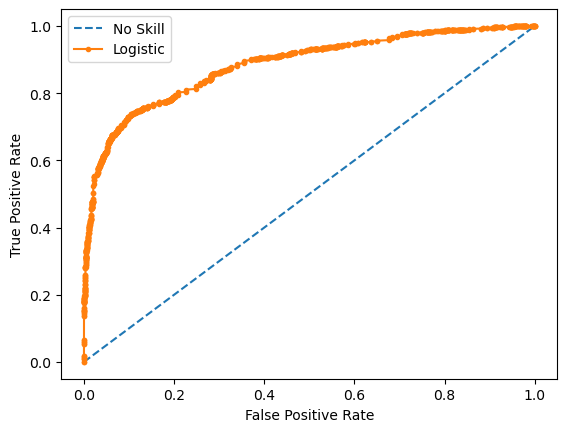

In [79]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [80]:
rmse = sqrt(mean_squared_error(testy, y_pred))
print("Root Mean Squared Error: {}".format(round(rmse, 2)))

Root Mean Squared Error: 0.45
